#Question 3(i)

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
import pandas as pd
balance_data=pd.read_csv("F:\cse 5A\7th sem\aiml lab\car_evaluation.csv",sep= ',', header= None")
#print "Dataset:: "

#df1.head()

le = preprocessing.LabelEncoder()
balance_data = balance_data.apply(le.fit_transform)

X = balance_data.values[:, 0:5]
Y = balance_data.values[:,6]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)

clf_gini.fit(X_train, y_train)

def display_image(clf_gini, X,Y):
    plt.figure()
    plt.figure(figsize=(40, 40))
    tree.plot_tree(clf_gini,filled=True)
    plt.show()


decision_tree_classifier = train_model(X , Y)
display_image(decision_tree_classifier, X,Y )



y_pred = decision_tree_classifier.predict([[9.0,3571,1976,0.525]])
print(y_pred)

SyntaxError: EOL while scanning string literal (197572015.py, line 8)

In [33]:
#Question 3(ii) 

In [7]:
import pandas as pd


data = pd.read_csv("BankNote_Authentication.csv")


x = data.drop('class',axis='columns')
y = data['class']

import matplotlib.pyplot as plt
#matplotlib is used to plot the decision tree

from sklearn import tree
#sklearn tree is used to import decision tree classifier
a = [0,1]
 
def load_data_set():
  iris = load_iris()
  return iris
 
 
def train_model(x, y):
   clf = tree.DecisionTreeClassifier(criterion = "entropy")
   #initilzing the the model with criterion entropy
   clf = clf.fit(x,y)
   #training the model
   return clf
  
def display_image(clf, x,y):
    plt.figure()
    plt.figure(figsize=(40, 40))
    tree.plot_tree(clf,filled=True)
    plt.show()


decision_tree_classifier = train_model(x , y)
display_image(decision_tree_classifier, x,y )


y_pred = decision_tree_classifier.predict([[3.621,8.6610,-2.8073,-0.44699]])
print(y_pred)



ModuleNotFoundError: No module named 'pandas'

In [35]:
#Question 3(iii)

<Figure size 432x288 with 0 Axes>

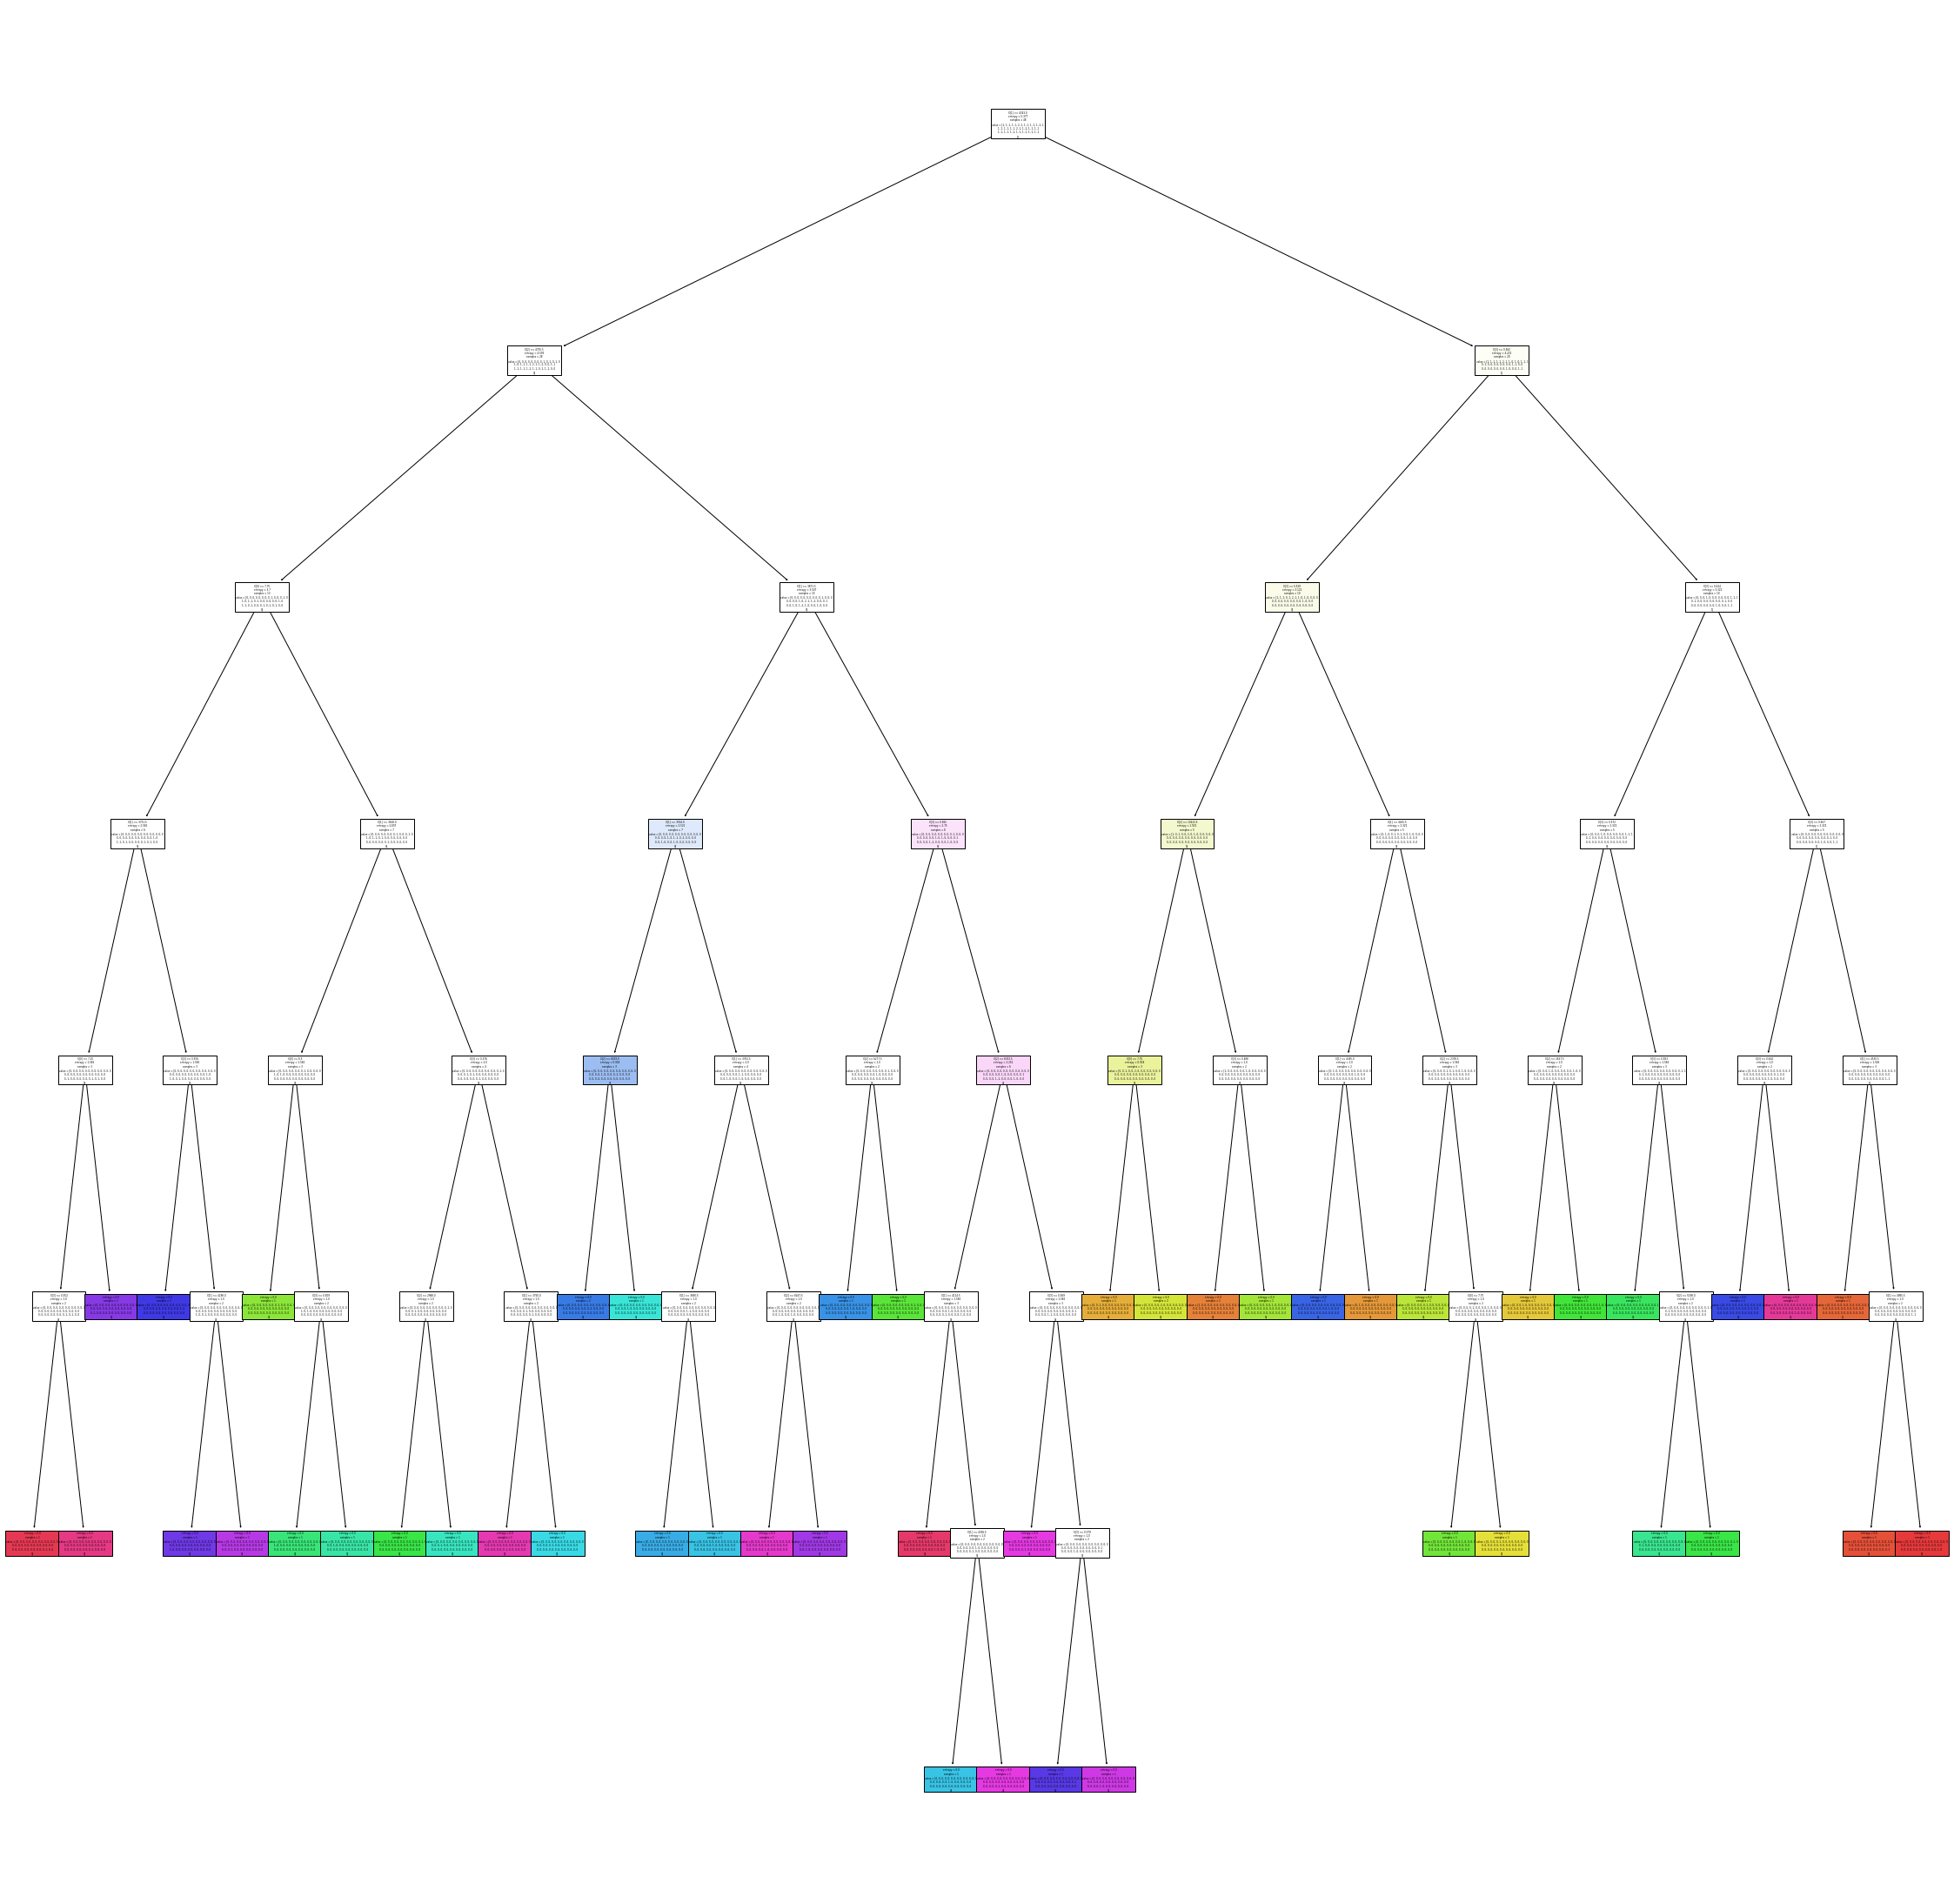

[541]


In [36]:
import pandas as pd
data = pd.read_csv("petrol_consumption.csv")

x = data.drop('Petrol_Consumption',axis='columns')
y = data['Petrol_Consumption']

import matplotlib.pyplot as plt
#matplotlib is used to plot the decision tree
from sklearn.datasets import load_iris
#sklearn.datasets is used to import the dataset
from sklearn import tree
#sklearn tree is used to import decision tree classifier
a = [0,1]
 
def load_data_set():
  iris = load_iris()
  return iris
 
 
def train_model(x, y):
   clf = tree.DecisionTreeClassifier(criterion = "entropy")
   #initilzing the the model with criterion entropy
   clf = clf.fit(x,y)
   #training the model
   return clf
  
def display_image(clf, x,y):
    plt.figure()
    plt.figure(figsize=(40, 40))
    tree.plot_tree(clf,filled=True)
    plt.show()


decision_tree_classifier = train_model(x , y)
display_image(decision_tree_classifier, x,y )



y_pred = decision_tree_classifier.predict([[9.0,3571,1976,0.525]])
print(y_pred)


#Question 4(i)

In [6]:
import sklearn.datasets as skd

categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
news_train = fetch_20newsgroups(subset='train', categories=categories)
news_test = fetch_20newsgroups(subset='train', categories=categories)

print(news_train.keys())

print(news_train['target_names'])

from sklearn.feature_extraction.text import CountVectorizer

count_vect=CountVectorizer()

X_tarin_tf=count_vect.fit_transform(news_train.data)

print(X_tarin_tf)

X_tarin_tf.shape

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer()

X_train_tfidf=tfidf_transformer.fit_transform(X_tarin_tf)

X_train_tfidf.shape

from sklearn.naive_bayes import MultinomialNB

clf= MultinomialNB().fit(X_train_tfidf, news_train.target)

X_test_tf=count_vect.transform(news_test.data)

X_test_tfidf=tfidf_transformer.transform(X_test_tf)

predicted=clf.predict(X_test_tfidf)

predicted

from sklearn import metrics 

from sklearn.metrics import accuracy_score

print("Accuracy",accuracy_score(news_test.target,predicted))

print(metrics.confusion_matrix(news_test.target,predicted))

ModuleNotFoundError: No module named 'sklearn'

#Question 4(ii)

In [9]:
#Categorizing given email is spam or ham
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


dataset = pd.read_csv('spamham.csv')
dataset.head() 
dataset .columns #Index(['text', 'spam'], dtype='object')
dataset.shape  #(5728, 2)
#Checking for duplicates and removing them
dataset.drop_duplicates(inplace = True)
dataset.shape  #(5695, 2)
#Checking for any null entries in the dataset
print (pd.DataFrame(dataset.isnull().sum()))
#Checking class distribution
dataset.groupby('spam').count()
'''
spam      
0     4327
1     1368
'''
dataset['length'] = dataset['text'].map(lambda text: len(text))
#Let's plot histogram for length distribution by spam
dataset.hist(column='length', by='spam', bins=50)
#we can see some extreme outliers, we'll set a threshold for text length and plot the histogram again
dataset[dataset.length < 10000].hist(column='length', by='spam', bins=100)
#Using Natural Language Processing to cleaning the text to make one corpus
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#Every mail starts with 'Subject :' lets remove this from each mail 
dataset['text']=dataset['text'].map(lambda text: text[1:])
dataset['text'] = dataset['text'].map(lambda text:re.sub('[^A-Za-z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())
ps = PorterStemmer()
corpus=dataset['text'].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))

'''
# Implemenation of corpus using function
corpus=[]
def fun(i):
    #return (list(filter(lambda text:text not in set(stopwords.words('english')),i)))
    return list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),i)))))
corpus= dataset['text'][0:5].apply(lambda i: fun(i))
'''
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus.values).toarray()
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Fitting classifier to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
classifier.fit(X_train , y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#this function computes subset accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) #0.99122036874451269
accuracy_score(y_test, y_pred,normalize=False) #1129 out of 1139

# Applying k-Fold Cross Validation
from sklearn.cross_validation import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)#array([ 0.98903509,  0.98903509,  0.99122807,  0.98026316,  0.98245614,0.98903509,  0.98901099,  0.99340659,  0.99340659,  0.98681319])
accuracies.mean()# 0.98836899942163114
accuracies.std()#0.0040467182445280397


# Create CV training and test scores for various training set sizes
from sklearn.learning_curve import learning_curve
train_sizes, train_scores, test_scores = learning_curve(classifier, X, y,cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


    
    


ModuleNotFoundError: No module named 'numpy'

In [53]:
#Question 4(iii) 

In [38]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB



# Function importing Dataset
def importdata():
    balance_data = pd.read_csv('balance-scale.csv',sep= ',', header = None)
    # Printing the dataswet shape
    print ("Dataset Length: ", len(balance_data))
    print ("Dataset Shape: ", balance_data.shape)
    # Printing the dataset obseravtions
    print ("Dataset: ",balance_data.head())
    return balance_data

# Function to split the dataset
def splitdataset(balance_data):

	# Separating the target variable
	X = balance_data.values[:, 1:5]
	Y = balance_data.values[:, 0]

	# Splitting the dataset into train and test
	X_train, X_test, y_train, y_test = train_test_split(
	X, Y, test_size = 0.3, random_state = 100)
	
	return X, Y, X_train, X_test, y_train, y_test
	

	
# Function to perform training with entropy.
def train(X_train, X_test, y_train):
    #Create a Gaussian Classifier

    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    return gnb


# Function to make predictions
def prediction(X_test, clf_object):

	# Predicton on test with giniIndex
	y_pred = clf_object.predict(X_test)
	print("Predicted values:")
	print(y_pred)
	return y_pred
	
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
	
	print("Confusion Matrix: ",
		confusion_matrix(y_test, y_pred))
	
	print ("Accuracy : ",
	accuracy_score(y_test,y_pred)*100)
	
	print("Report : ",
	classification_report(y_test, y_pred))

    
data = importdata()
X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
clf = train(X_train, X_test, y_train)
	

print("Results Using Entropy:")
# Prediction using entropy
y_pred_entropy = prediction(X_test, clf)
cal_accuracy(y_test, y_pred_entropy)
	
	



Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5
Results Using Entropy:
Predicted values:
['L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'L'
 'L' 'L' 'L' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'R' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L'
 'R' 'L' 'R' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R'
 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L'
 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R'
 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R'
 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'L' 'R' 'R'
 'R' 'R' 'R' 'L' 'L' 'L' 'R' 'R']
Confusion Matrix:  [[ 0  9  4]
 [ 0 8

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
#Question  5(i) load_digits is dataset that is inbuilt in the sklearn.dataset llbrary

Digit dataset loaded...
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Label 0 - 0
Label 1 - 1
Label 2 - 2
Label 3 - 3
Label 4 - 4
Label 5 - 5
Label 6 - 6
Label 7 - 7
Label 8 - 8
Label 9 - 9
Confusion Matrix
[[20  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0]
 [ 0  1  0  0  0  0  0  0 18  0]
 [ 0  1  0  1  0  0  0  0  0 18]]
Correct predicition results 98.33333333333333 %
Worng predicition results 1.6666666666666718 %


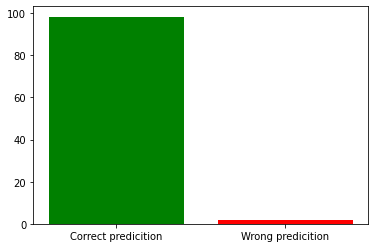

In [40]:
from sklearn import datasets
digit = datasets.load_digits()
print("Digit dataset loaded...")

print(digit.keys())
for i in range(len(digit.target_names)):
  print("Label", i, "-",str(digit.target_names[i]))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, test_size=0.1)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

correct_pred = accuracy_score(y_test,y_pred)*100
wrong_pred = (1-accuracy_score(y_test,y_pred))*100
print("Correct predicition results",correct_pred,"%")
print("Worng predicition results",wrong_pred,"%")

import matplotlib.pyplot as plt
plt.bar('Correct predicition', correct_pred, color ='green')
plt.bar('Wrong predicition', wrong_pred, color ='red')
plt.show()


In [41]:
#Question 5(ii) load_wine is dataset that is inbuilt in the sklearn.dataset llbrary

Wine dataset loaded...
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
Label 0 - class_0
Label 1 - class_1
Label 2 - class_2
Confusion Matrix
[[3 0 0]
 [0 8 1]
 [0 2 4]]
Correct predicition results 83.33333333333334 %
Worng predicition results 16.666666666666664 %


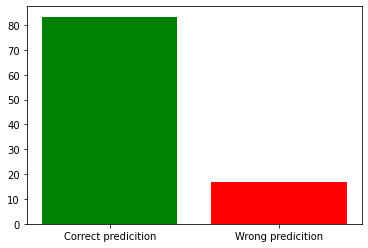

In [42]:
from sklearn import datasets
wine = datasets.load_wine()
print("Wine dataset loaded...")

print(wine.keys())
for i in range(len(wine.target_names)):
  print("Label", i, "-",str(wine.target_names[i]))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

correct_pred = accuracy_score(y_test,y_pred)*100
wrong_pred = (1-accuracy_score(y_test,y_pred))*100
print("Correct predicition results",correct_pred,"%")
print("Worng predicition results",wrong_pred,"%")

import matplotlib.pyplot as plt
plt.bar('Correct predicition', correct_pred, color ='green')
plt.bar('Wrong predicition', wrong_pred, color ='red')
plt.show()


In [43]:
#Question 6(i) by default the k-nn classifier takes the Minkowski distance to classify
# and by default p = 2, which makes the distance calculation to of euclidean distance
#so here we don't have to specify any thing over here just the p = 2 will do 
#The belowe is the reference link which has the function prototyping
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


#Checkout the below blog to get to know the formulas of the respective distance( Euclidean, cosine, Minkowski
#and Manhettan)
#https://www.geeksforgeeks.org/measures-of-distance-in-data-mining/


#Checkout the following blog for Hamming distance 
#https://www.tutorialspoint.com/what-is-hamming-distance

In [44]:
from sklearn import datasets
iris = datasets.load_iris()
print("Iris dataset loaded...")

print(iris.keys())

for i in range(len(iris.target_names)):
  print("Label", i, "-",str(iris.target_names[i]))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3, p = 2 )
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

print("Correct predicition results",accuracy_score(y_test,y_pred)*100,"%")
print("Worng predicition results",(1-accuracy_score(y_test,y_pred))*100,"%")


Iris dataset loaded...
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Confusion Matrix
[[7 0 0]
 [0 3 1]
 [0 0 4]]
Correct predicition results 93.33333333333333 %
Worng predicition results 6.666666666666665 %


In [45]:
#Question 6(ii) hamming distance, here we have to specify hamming while initializing the model for the metric attribute


In [46]:
from sklearn import datasets
iris = datasets.load_iris()
print("Iris dataset loaded...")

print(iris.keys())

for i in range(len(iris.target_names)):
  print("Label", i, "-",str(iris.target_names[i]))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3,metric = 'hamming' )
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

print("Correct predicition results",accuracy_score(y_test,y_pred)*100,"%")
print("Worng predicition results",(1-accuracy_score(y_test,y_pred))*100,"%")


Iris dataset loaded...
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Confusion Matrix
[[5 0 0]
 [0 3 0]
 [1 3 3]]
Correct predicition results 73.33333333333333 %
Worng predicition results 26.66666666666667 %


In [47]:
#Question 6(iii) manhatten distance we need to speify the p = 1 
# as the formula for both manhatten and square euclidean are similar only their power differ

In [48]:
from sklearn import datasets
iris = datasets.load_iris()
print("Iris dataset loaded...")

print(iris.keys())

for i in range(len(iris.target_names)):
  print("Label", i, "-",str(iris.target_names[i]))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3,p = 1 )
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

print("Correct predicition results",accuracy_score(y_test,y_pred)*100,"%")
print("Worng predicition results",(1-accuracy_score(y_test,y_pred))*100,"%")


Iris dataset loaded...
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Confusion Matrix
[[7 0 0]
 [0 3 1]
 [0 0 4]]
Correct predicition results 93.33333333333333 %
Worng predicition results 6.666666666666665 %


In [49]:
#Question 6(iv) for minkowski we don't have  to specify anything, it is taken by default
#we just need to give the k value 

In [50]:
from sklearn import datasets
iris = datasets.load_iris()
print("Iris dataset loaded...")

print(iris.keys())

for i in range(len(iris.target_names)):
  print("Label", i, "-",str(iris.target_names[i]))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

print("Correct predicition results",accuracy_score(y_test,y_pred)*100,"%")
print("Worng predicition results",(1-accuracy_score(y_test,y_pred))*100,"%")
from sklearn import datasets
iris = datasets.load_iris()
print("Iris dataset loaded...")

print(iris.keys())

for i in range(len(iris.target_names)):
  print("Label", i, "-",str(iris.target_names[i]))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3,p = 1 )
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

print("Correct predicition results",accuracy_score(y_test,y_pred)*100,"%")
print("Worng predicition results",(1-accuracy_score(y_test,y_pred))*100,"%")


Iris dataset loaded...
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Confusion Matrix
[[7 0 0]
 [0 2 0]
 [0 2 4]]
Correct predicition results 86.66666666666667 %
Worng predicition results 13.33333333333333 %
Iris dataset loaded...
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Confusion Matrix
[[3 0 0]
 [0 3 1]
 [0 1 7]]
Correct predicition results 86.66666666666667 %
Worng predicition results 13.33333333333333 %


In [51]:
#Question 6(v) for cosine we need to specify metric equal to cosine

In [52]:
from sklearn import datasets
iris = datasets.load_iris()
print("Iris dataset loaded...")

print(iris.keys())

for i in range(len(iris.target_names)):
  print("Label", i, "-",str(iris.target_names[i]))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3, metric = 'cosine')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

print("Correct predicition results",accuracy_score(y_test,y_pred)*100,"%")
print("Worng predicition results",(1-accuracy_score(y_test,y_pred))*100,"%")
from sklearn import datasets
iris = datasets.load_iris()
print("Iris dataset loaded...")

print(iris.keys())

for i in range(len(iris.target_names)):
  print("Label", i, "-",str(iris.target_names[i]))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3,p = 1 )
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

print("Correct predicition results",accuracy_score(y_test,y_pred)*100,"%")
print("Worng predicition results",(1-accuracy_score(y_test,y_pred))*100,"%")



Iris dataset loaded...
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Confusion Matrix
[[6 0 0]
 [0 5 0]
 [0 1 3]]
Correct predicition results 93.33333333333333 %
Worng predicition results 6.666666666666665 %
Iris dataset loaded...
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Confusion Matrix
[[6 0 0]
 [0 4 0]
 [0 0 5]]
Correct predicition results 100.0 %
Worng predicition results 0.0 %
